# Numpy ve Pandas kütüphanesi ile Doğrusal Regresyon modeli

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"real_estate_data.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [126]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Text(0.5, 1.0, 'Population Vs Profit')

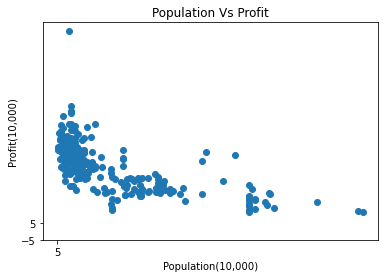

In [127]:
X = data["X3 distance to the nearest MRT station"] 
y= data["Y house price of unit area"]   

from sklearn.model_selection import train_test_split


x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=0)

x_train = x_train.sort_index()
y_train = y_train.sort_index()
x_test = x_test.sort_index()
y_test = y_test.sort_index()

y_test = y_test.values.reshape(len(y_test),1) 
y_train = y_train.values.reshape(len(y_train),1) 
x_test = x_test.values.reshape(len(x_test),1) 
x_train= x_train.values.reshape(len(x_train),1) 


plt.scatter(x_train,y_train)
plt.xticks(np.arange(5,10,step=10))
plt.yticks(np.arange(-5,10,step=10))
plt.xlabel("Population(10,000)")
plt.ylabel("Profit(10,000)")
plt.title("Population Vs Profit")


In [128]:
def standard(x):
    return (x-np.mean(x))/np.std(x)

x_train = standard(x_train)
x_test = standard(x_test)
y_train = standard(y_train)
y_test = standard(y_test)



In [129]:
m = len(y_train) # m = 97
n = len(y_test)
X_train = np.append(np.ones((m,1)),x_train,axis=1) # X = (64,2)

x_test = np.append(np.ones((n,1)),x_test,axis=1)

y_train = y_train # y = (64,1)

theta=np.zeros((2,1))

In [130]:
def computeCost(x_train,y_train,theta): 
    
    m=len(y_train)
    
    hypothesis = x_train.dot(theta)  
    
    square_err = (hypothesis - y_train)**2
    
    return 1/(2*m)*np.sum(square_err)




computeCost(X_train,y_train,theta)


0.4999999999999999

In [131]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):

    m=len(y_train)
    
    J=[]
    
    for i in range(num_iters):
        hypothesis = x_train.dot(theta)
        error = np.dot(x_train.transpose(),(hypothesis - y_train))
        descent = alpha * 1/m * error
        
        theta  -= descent
        
        J.append(computeCost(x_train,y_train,theta))
    
    return theta, J



theta,J = gradientDescent(X_train,y_train,theta,0.01,1000)




print("J(x) ="+str(theta[0,0])+" + "+str(theta[1,0])+"*x1")


J(x) =-3.8874639568391077e-16 + -0.6721827060423128*x1


Text(0.5, 1.0, 'Cost function using Gradient Descent')

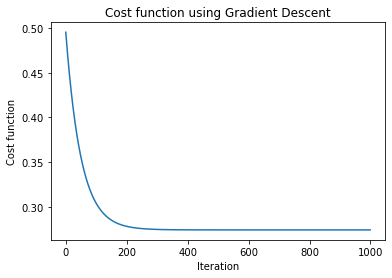

In [132]:
plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.title("Cost function using Gradient Descent")

In [133]:
def predict(x_test,theta):
    
    y_pred = np.dot(x_test,theta)
    
    return y_pred

y_pred =predict(x_test,theta)

In [134]:
def r2score1(y_test,y_pred):
    
    hkt = (y_test- y_pred)**2
    
    oft = (y_test - np.mean(y_test))**2
    
    r2 = 1-(np.sum(hkt)/np.sum(oft))
    
    return r2

print("r2 değeri: "+ str(round(r2score1(y_test,y_pred),5)))

r2 değeri: 0.46387


In [135]:

def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)


mSE(y_pred, y_test)

print("Mean Squared Error değeri: "+ str(round(mSE(y_pred, y_test),5)))


Mean Squared Error değeri: 0.53613
